In [2]:
import sys

sys.path.append("/home/code")

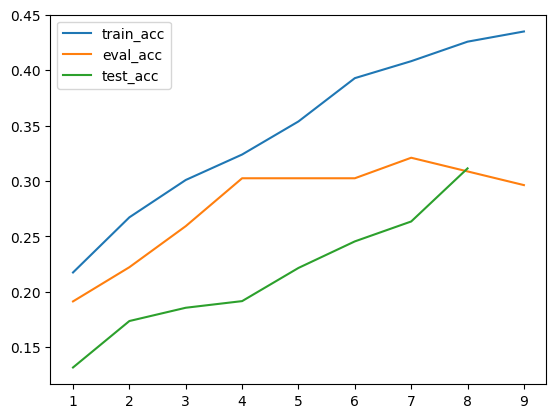

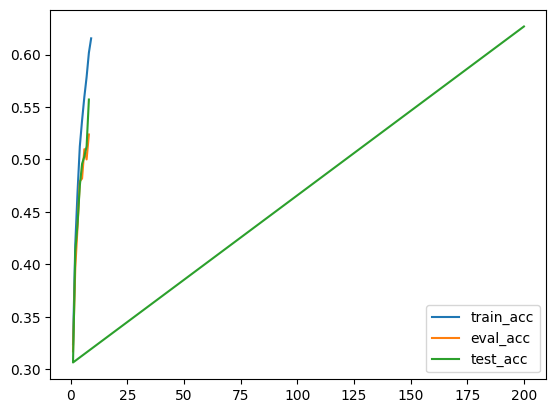

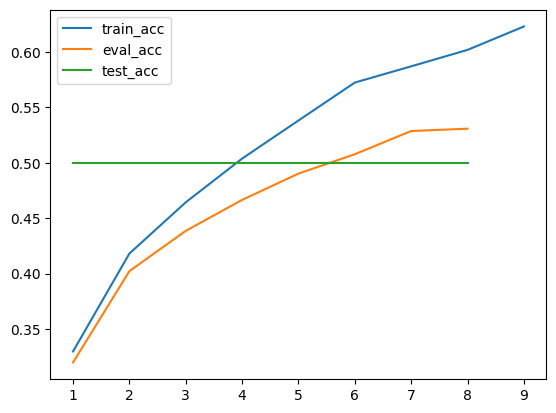

In [5]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt

def draw_det_graph(id):
    workdb = WorkDB()
    df = workdb.get_report_df(id)

    for task in ["train", "eval", "test"]:
        task_df = df[df["task"] == task]
        plt.plot(task_df["version"], task_df["precision"], label=f"{task}_precision")
        plt.plot(task_df["version"], task_df["recall"], label=f"{task}_recall")    
    plt.legend()
    return plt

def draw_rec_graph(id):
    workdb = WorkDB()
    df = workdb.get_report_df(id)
    for task in ["train", "eval", "test"]:
        task_df = df[df["task"] == task]
        plt.plot(task_df["version"], task_df["acc"], label=f"{task}_acc")
        # plt.plot(task_df["version"], task_df["recall"], label=f"{task}_recall")    
    plt.legend()
    return plt

draw_rec_graph("rec_PPOCR_sangmu").show()
draw_rec_graph("rec_PPOCR_outsourcing").show()
draw_rec_graph("rec_PPOCR_sangmu_and_outsourcing").show()

In [23]:
from database import *
workdb = WorkDB()
# df = workdb.get_report_df("rec_PPOCR_sangmu")
# df.groupby("dataset").count()


# df = workdb.get_report_df("rec_PPOCR_outsourcing")
# df.groupby("dataset").count()

df = workdb.get_report_df("rec_PPOCR_sangmu_and_outsourcing")
df

,work_id,version,task,acc,fps,norm_edit_dis
0,rec_PPOCR_sangmu_and_outsourcing,200,test,0.499998,0.560695,0.875001
